# Sistemas de recomendación
* Son tal vez los que en el momento producen mayores ingresos economicos.
* 80% de la usuarios de Netflix son por sistemas de recomendacion
* 35% de los usuarios de Amazon son por sistemas de recomendacion.
* Hace un tiempo solo se visitan sitios por recomendacion personal.


Ejemplos de sistemas de recomendacion
* Spotify (musica)
* YouTube
* Walmart, Target
* Los anuncios en Google, Facebook
* Hulu, Netflix, PrimeVideo
* Amazon: libros, peliculas, para envio de articulos en general.
* etc.


Hay dos tipos de sistemas de recomendacion que estudiamos hoy

* Basados en contenido (content-based recommendations).
* Filtros colaborativos (collaborative filter).

## Sistemas de recomendacion basados en contenido.











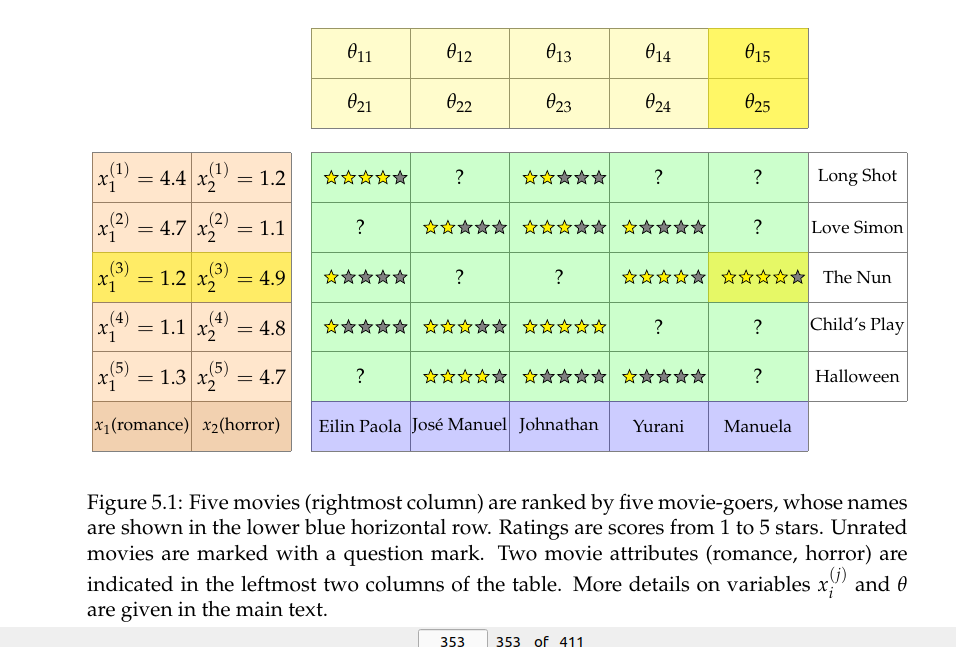

Explicada la grafica vamos a la matematica.
Esto lo vemos como un problema de regresion  lineal.

Si vemos las lineas resaltadas en amarillo

Tenemos

$$y_{ij} = (x^{(i)})^T \Theta_j  .$$
donde aca $y_{ij}$ es el numero de estrellas (4 en el ejemplo resaltado en amarillo), $x^{(i)}$ son los atributos (horror, romance) y donde $\Theta_j$
es la columna con parametros de aprendizaje.

En el ejemplo particular tenemos que

$$ y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25} = (1.2, 4.9) \cdot (\theta_{15}, \theta_{25}) = 4.0 .$$

En este sentido los sitemas de recomendacion son una regresion lineal.

Pasamos a definir la funcion objetivo.
Sea $Y$ la calificacion de las peliculas, $X$ la matriz de atributos (horror, romance), $\Theta$ la matriz de aprendizaje, entonces


$$ J_{\Theta} = \frac12 \| Y - X \Theta \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 . \tag{1} $$

donde $\| . \|_F$ quiere decir norma Frobenius (si no recuerdan es la raiz cuadrada de la suma de **todas** las componentes, en valor absoluto de la matriz $\sum_i \sum_j | a_{ij} | $.

Queremos minimizar este "error" $J(\Theta)$.

Pregunta: Que pasa con las interrogaciones?
Para poder dejar participar aqueyas calificaciones que tienen interrogacion defininos la fuincion **logic rating matrix** (matriz de calificacion logica) que asigna $1$ a $R=r_{ij}$ si la pelicula  $i$ fue calificada por el usuario $j$, y 0 si no.


\begin{eqnarray}
r_{ij} =
\left \{
    \begin{array}{cc}
    1  & \text{ si la  pelicula  } i  \text{  fue calificada por el usuario } j \\
    0 & \text{en caso contrario}
    \end{array}
    \right .
\end{eqnarray}

En la funcion objetivo (1) asumimos que todas las peliculas recibieron calificacion de todos los usuarios. Debemos moficiar la funcion objetivo (costo) (1) para el caso de matrices con interrogaciones (?)



$$ J_{\Theta} = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2  . \tag{2} $$

Lo que sigue de la funcion de costo, es el gradiente de la funcion de costo.
Una vez tengamos la funcio de costo y su gradiente, pasamos a optimizar usando los metodos de descenso de gradiente, como lo han visto en casi todas las tareas.

Para obtener este gradiente, lo hago mas adelante con una funcion de costo mucho mas general que esta de forma que el gradiente alli se reduce al gradiente aca.




## Filtros colaborativos.

La idea detras de filtros colaborativos es la posibilidad que ni siquiera conozcamos los valores de los atributos $X$. Que depronto conocemos los parametros de aprendizaje $\Theta$. Cambiamos la funcion de costo
(2) intercambiando $X$ por $\Theta$

$$ J_{X} = \frac12 \| R \circ (Y - X \Theta) \|_F^2 + \frac{\lambda}{2} \| X \|_F^2 . \tag{3} $$

Sin embargo un caso mas general es pensar que que no conocemos $X$ ni conocemos $\Theta$.




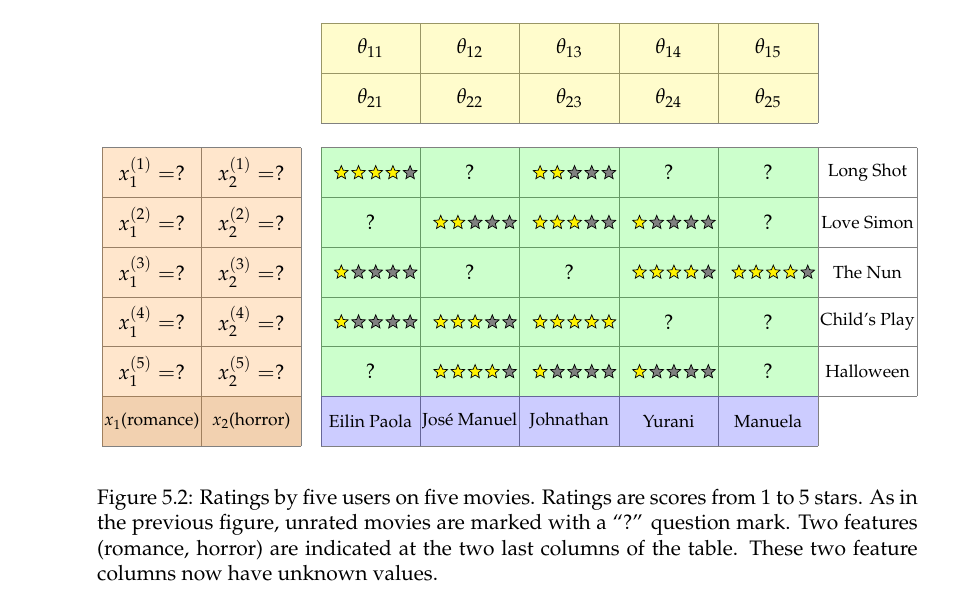

Hay dos formas de resolver este problema.

* **Metodo 1**: (feature learning: aprendizaje de atributos) Inicialmente no tenemos **ni idea** de $X$ ni de $\Theta$.
Entonces, podemos asumir un $X_1$ **aleatorio** (al azar) y usamos la funcion objetivo (2) para obtener $\Theta_1$. Con este $\Theta_1$ usamos la funcion objetivo (3) para obtener $X_2$, y asi sucesivamente


$$ X_1 \mapsto \Theta_1 \mapsto X_2 \mapsto \cdots \mapsto X_n \mapsto \Theta_n .$$
paramos en el momento que que las funciones objetivo $J_{\Theta}$ y $J_X$ sean lo "suficientemente" pequenhas.

* **Metodo 2**: Se construye una funcion obejtivo compartida.


$$J=J(\Theta, X) = \frac12 \| R \circ (Y - X \Theta) \|^2 + \frac{\lambda}{2}
\left ( \| \Theta \|_F^2 + \| X \|_F^2   \right ) \tag{4}.$$




Hallemos el gradiente de $J$ con respecto a $X$. Con respecto a $\Theta$ queda de tarea.

$$ J = \frac12 \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \left ( y_{ij} - \sum_{k=1}^{n_f} x_{ik} \theta_{kj} \right )^2 + \frac{\lambda}{2} \left ( \sum_{i=1}^{n_f} \sum_{j=1}^{n_u} \theta_{ij}^2 + \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2 \right )  .$$

El gradiente con respecto a $X$, es decir $\nabla_X$


\begin{eqnarray}
\frac{\partial J}{\partial x_{st}} &=&  \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}  \left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right )
\sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}} + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{\partial x_{st}} x_{ij}
\\
\frac{\partial J}{\partial x_{st}} &=&  \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}  \left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right )
\sum_{p=1}^{n_f} \theta_{pj} \frac{\partial x_{ip}}{\partial x_{st}} + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \frac{\partial x_{ij}}{\partial x_{st}} x_{ij} \\
\frac{\partial J}{\partial x_{st}} &=&  \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij}  \left ( \sum_{k=1}^{n_f} x_{ik} \theta_{kj} - y_{ij}  \right )
\sum_{p=1}^{n_f} \theta_{pj} \delta_{is} \delta_{pt} + \lambda \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} \delta_{si} \delta_{tj} x_{ij} \\
&=& \sum_{j=1}^{n_u} r_{sj} \left ( \sum_{k=1}^{n_f} x_{sk} \theta_{kj} - y_{sj}  \right ) \theta_{tj} + \lambda x_{st}
\end{eqnarray}

De forma matricial


$$ \nabla_X J = [ R \circ (X \Theta - Y) ] \Theta^T + \lambda X .$$

De la misma forma se puede ver que


$$ \nabla_{\Theta} J = X^T [ R \circ (X \Theta - Y)] + \lambda \Theta .$$
Se deja como ejercicio (pero no para ustedes).


Que hacemos con esto. Una vez tenemos $X$ y tenemos $\Theta$ podemos hallar las calificaciones (rating) los $Y$

$$ \text{rating} = (X^{(i)})^T \Theta_j.$$

Con esto, usted puede general un umbral. Por decir algo $3$ (que mas tres estrellas es sugerible. Decirle al usuario $j$ que a el le debe gustar la pelicula $i$ por que $y_{ij} > 3$.

Otra cosa que se puede hacer con esto es medir similitud en peliculas.


$$ \| X^{(i)} - X^{(j)} \|^2 .$$
Si esta norma es pequenha entonces la pelicular $i$ esta muy cerca de la pelicula $j$. Y si un usuario dejo que le gustaba la pelicula $i$ le debe gustar la pelicula $j$ y se le puede sugerir la pelicula $j$.


## Normalizacion por la media.

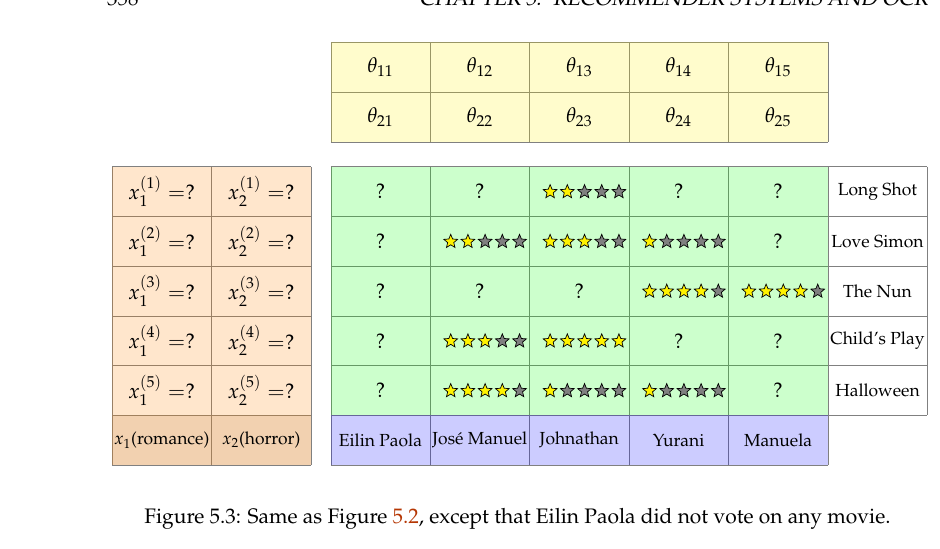

por favor, en la figura 5.3 observe que Eilin Paola no quisi calificar ninguna de las peliculas. Si calcula el $Y$ para eilin paola obtiene


$$ Y^{(ij)} = (X^{(i)})^T \Theta_{ij}  .$$
Pasa que $\Theta_{ij}=0$, por es el que miniza la ecuacion (4) entonces
$Y^{(ij}) = 0$, para Eilin Paola.

No es justo decir que Eilin Paola odia todas las peliculas. Simplemente no quiso calificarlas.

La idea aca es sacar la media por atributo.
Hacemos normalizacion por la media (restar la media).



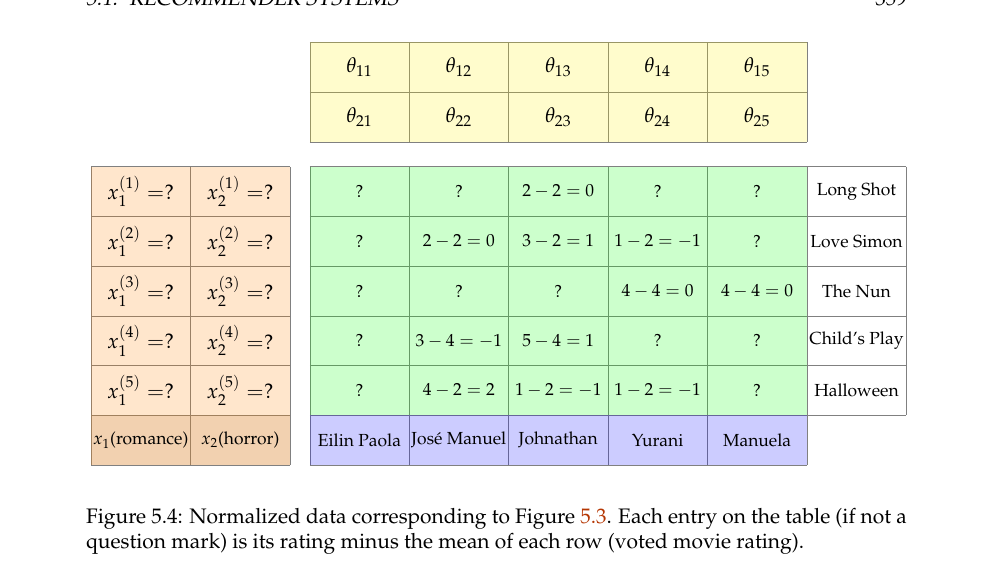

Resolvemos el problema de la Figura 5.4, y luego de resolverlo le sumamos
la media $\mu_i$ a cada uno de los $Y^{(ij)}$, y con seguridad Eilin Paola ya no va a tener ceros en su evaluacion.